In [116]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(suppress=True, precision = 2)


# Data Wrangling and Cleaning

In [117]:
# Read the JSON file into a DataFrame
yelp_data = pd.read_json("yelp_academic_dataset_business.json", lines=True)

In [118]:
#Print the first five rows of the data frame we just loaded, I like to do this for a preview of the data
yelp_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [119]:
#This helps me understand what column data i will need to change for exploratory analysis.
print(yelp_data.dtypes)
#This command shows us that we have 150,345 business entries in our dataframe````````
yelp_data.shape

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object


(150346, 14)

In [120]:
#upon examining the column names I can see there will need to be some data rexamined in the 'AB' and 'XMS' categories
print(yelp_data['state'].unique())
#The 'city' column also seems to have some interesting values that need some more analysis
print(yelp_data['city'].unique())

['CA' 'MO' 'AZ' 'PA' 'TN' 'FL' 'IN' 'LA' 'AB' 'NV' 'ID' 'DE' 'IL' 'NJ'
 'NC' 'CO' 'WA' 'HI' 'UT' 'TX' 'MT' 'MI' 'SD' 'XMS' 'MA' 'VI' 'VT']
['Santa Barbara' 'Affton' 'Tucson' ... 'Wales' 'UPPER MORELAND'
 'Apollo beach']


In [121]:
# The 'AB' category is an easy fix, oddly it seems the wrong state code for alabama was used, it should be 'AL'
odd_state_value = yelp_data[yelp_data.state == 'AB']
print(odd_state_value.head())

#We should update every row in our original data frame that contains 'AB' in the 'state' column to 'AL'
yelp_data.loc[yelp_data['state'] == 'AB', 'state'] = 'AL'

#Now lets just make sure my code worked correctly
print(yelp_data['state'].unique())

               business_id                                  name  \
20  WKMJwqnfZKsAae75RMP6jA        Roast Coffeehouse and Wine Bar   
46  JX4tUpd09YFchLBuI43lGw       Naked Cyber Cafe & Espresso Bar   
52  5BmQX4UVJY19mMtafMg7JA  Breadland Organic Whole Grain Bakery   
53  cVBxfMC4lp3DnocjYA3FHQ                     Paws The Cat Cafe   
77  mFTaYsRDyeFaY2NDLfSaAA                      River City Games   

                       address      city state postal_code   latitude  \
20         10359 104 Street NW  Edmonton    AB     T5J 1B9  53.546045   
46        10303  108 Street NW  Edmonton    AB     T5J 1L7  53.544682   
52  11642 104 Avenue, Unit 642  Edmonton    AB     T5K 2T7  53.547205   
53            10588 109 Street  Edmonton    AB     T5H 3B2  53.549633   
77           5203 99 Street NW  Edmonton    AB     T6E 5B7  53.489312   

     longitude  stars  review_count  is_open  \
20 -113.499169    4.0            40        0   
46 -113.506589    4.0            12        1   
52 -113.

In [122]:
#Now lets go through the same process for the "XMS" category of the 'state' column
odd_state_value = yelp_data[yelp_data.state == 'XMS']
print(odd_state_value.head())

#There is only one entry for the 'XMS'category and it seems to be for Pumpernickles Catering in Liverpool, England. This information isn't relevant to our study so I'm electing to remove it from our original dataframe
yelp_data = yelp_data[yelp_data['state'] != 'XMS']

#Lets check like we did for 'AB'
print(yelp_data['state'].unique())


                  business_id                    name             address  \
98685  IvQs2hhXKZ4NgZhVZ5jjjQ  Pumpernickles Catering  95a Mount Pleasant   

            city state postal_code   latitude  longitude  stars  review_count  \
98685  Liverpool   XMS      L3 5TB  38.673049 -90.423156    4.0             5   

       is_open                                         attributes  \
98685        1  {'RestaurantsPriceRange2': '2', 'BusinessParki...   

                                              categories hours  
98685  Caterers, Breakfast & Brunch, Convenience Stor...  None  
['CA' 'MO' 'AZ' 'PA' 'TN' 'FL' 'IN' 'LA' 'AL' 'NV' 'ID' 'DE' 'IL' 'NJ'
 'NC' 'CO' 'WA' 'HI' 'UT' 'TX' 'MT' 'MI' 'SD' 'MA' 'VI' 'VT']


In [123]:
#Lets examine the entries with 'Wales' in the 'city' column
odd_city_value = yelp_data[yelp_data.city == 'Wales']
print(odd_city_value.head())
#Looking more extensively at the business entry it seems the entry is actually for a business in North Wales, Pennsylvania. Since it's an entry still relevant to our study we don't need to do anything

                   business_id      name        address   city state  \
149841  i4Q1FYsQrJGIdINwvzVKkA  Old Navy  33 Airport Sq  Wales    PA   

       postal_code   latitude  longitude  stars  review_count  is_open  \
149841       19454  40.237927 -75.239896    3.0             8        1   

                                               attributes  \
149841  {'RestaurantsPriceRange2': '2', 'BusinessAccep...   

                                               categories  \
149841  Women's Clothing, Shopping, Men's Clothing, Fa...   

                                                    hours  
149841  {'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ...  


In [124]:
#Now that we've cleaned these columns we can change their data type to be categorical
yelp_data['state'] = pd.Categorical(yelp_data['state'])
yelp_data['city'] = pd.Categorical(yelp_data['city'])

#Finally we'll create a column the combines the stars and review count columns. This will make it easier to get a weighted aggregate when we group by city
yelp_data['power_score'] = yelp_data['stars'].astype(float) * yelp_data['review_count'].astype(float)

In [125]:
#Now that all of our data is cleaned and in the correct variable types we can begin to get a better understanding of where some of the highest rated business's are...
yelp_by_state = yelp_data.groupby('state').agg({
    'stars': 'mean',
    'review_count': 'sum',
    'power_score': 'sum'
}).reset_index()

yelp_by_state = yelp_by_state.sort_values(by='power_score', ascending=False)

print(yelp_by_state.head(20))

   state     stars  review_count  power_score
18    PA  3.573019       1540790    5704822.5
5     FL  3.610957       1119926    4222067.0
10    LA  3.679162        743176    2882772.0
20    TN  3.571500        598195    2253105.0
13    MO  3.546092        483897    1809189.0
9     IN  3.588246        472565    1795146.5
17    NV  3.736876        409950    1531652.5
1     AZ  3.592010        412639    1526814.5
2     CA  3.996733        339637    1347036.5
16    NJ  3.459114        249837     889525.5
7     ID  3.707634        152086     572420.0
0     AL  3.447515        105477     377001.5
4     DE  3.354967         67370     236593.0
8     IL  3.369697         49676     175067.0
19    SD  4.500000            42        189.0
6     HI  4.250000            32        134.5
3     CO  4.000000            30        118.0
21    TX  2.875000            33         86.0
22    UT  4.500000            19         85.5
25    WA  3.500000            19         73.5


/var/folders/xh/0wd_6y4x2_bgrmj7xkg_jvqh0000gn/T/ipykernel_42711/1646008844.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yelp_by_state = yelp_data.groupby('state').agg({


With this table we can see the average star rating of the business' in each state as well as the sum of their review count and each state's total "power score". As you can see, the best state according to Yelp is Pennsylvania followed closely by Florida, however both have lower average stars compared to other lower ranked states, so city rankings may still be different. 

Sorting by stars or review_count alone doesn't account for outliers such as business' with one five star review, or business' with a large number of bad reviews. The "power score" however gives us a way of accounting for both, and while this aggregate is in some ways still flawed, it gives us a more accurate measure of a city then only thinking about one factor.

In [128]:
yelp_by_city = yelp_data.groupby('city').agg({
    'stars': 'mean',
    'review_count': 'sum',
    'power_score': 'sum',
    'name': 'count'}).reset_index()
yelp_by_city.rename(columns={'name': "Total_Business'"}, inplace=True)

yelp_by_city = yelp_by_city.sort_values(by='power_score', ascending=False)

print(yelp_by_city.head(20))

                  city     stars  review_count  power_score  Total_Business'
865       Philadelphia  3.623035        936240    3543234.0            14569
757        New Orleans  3.822677        621361    2448289.0             6209
744          Nashville  3.637785        441053    1685754.0             6971
1156             Tampa  3.583315        439506    1654529.5             9050
1209            Tucson  3.594919        387254    1435418.0             9250
511       Indianapolis  3.579708        349228    1338450.5             7540
925               Reno  3.761584        334610    1257870.0             5935
1006     Santa Barbara  4.051449        262853    1053151.0             3829
988        Saint Louis  3.594054        244360     932034.0             4827
91               Boise  3.714164        101893     386049.5             2937
318           Edmonton  3.439058         98204     350848.0             5054
202         Clearwater  3.601306         84190     316413.0             2221

/var/folders/xh/0wd_6y4x2_bgrmj7xkg_jvqh0000gn/T/ipykernel_42711/4103325193.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yelp_by_city = yelp_data.groupby('city').agg({


Finally we'll visualize the data of our top 10 ranked cities in order to see how they compare across stars, review  count, and power score. This will help us recognize if our 'power_score' rankings are an accurate method of evaluating cities.

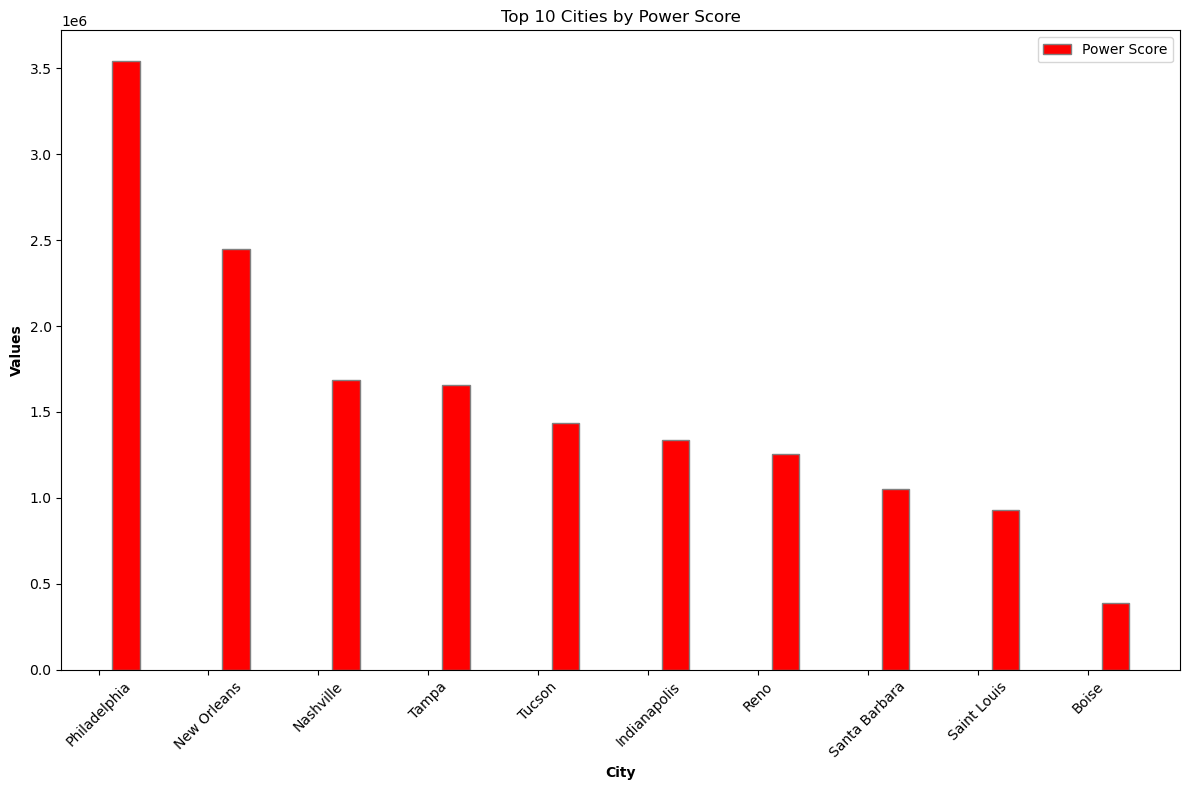

In [148]:
top_10_cities = yelp_by_city.nlargest(10, 'power_score')

fig, ax = plt.subplots(figsize=(12, 8))

r1 = np.arange(len(top_10_cities))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

ax.bar(r3, top_10_cities['power_score'], color='r', width=bar_width, edgecolor='grey', label='Power Score')

ax.set_xlabel('City', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(len(top_10_cities))])
ax.set_xticklabels(top_10_cities['city'], rotation=45)
ax.set_ylabel('Values', fontweight='bold')
ax.set_title('Top 10 Cities by Power Score')
ax.legend()

plt.tight_layout()
plt.show()

As we can see, Philadelphia and New Orleans are clearly the best cities based on Yelp reviews, but our graph does make it clearer how 